In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [6]:
df1 = pd.read_csv('/content/calories.csv')
df2 = pd.read_csv('/content/exercise.csv')
print(df1.shape)
print(df2.shape)
print(df1.head(2))
print(df2.head(2))

(15000, 2)
(15000, 8)
    User_ID  Calories
0  14733363     231.0
1  14861698      66.0
    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3


In [8]:
df= pd.merge(df1, df2, on='User_ID', how='inner')
df['Calories'] = df.pop('Calories')
df.to_csv('merged_data.csv', index=False)
print(df.shape)
print(df.head(2))

(15000, 9)
    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   

   Calories  
0     231.0  
1      66.0  


In [9]:
df = df.drop(columns=["User_ID"])
df.head(2)

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0


In [10]:
def data_quality_report(df):
    data_types = df.dtypes
    missing_values = df.isnull().sum()
    missing_percentage = (df.isnull().sum() / len(df)) * 100
    cardinality = df.nunique()
    report = pd.DataFrame({
        'Data Type': data_types,
        'Missing Values': missing_values,
        'Missing %': missing_percentage,
        'Cardinality (Unique Values)': cardinality
    })
    return report

report = data_quality_report(df)
print(report)

           Data Type  Missing Values  Missing %  Cardinality (Unique Values)
Gender        object               0        0.0                            2
Age            int64               0        0.0                           60
Height       float64               0        0.0                           90
Weight       float64               0        0.0                           91
Duration     float64               0        0.0                           30
Heart_Rate   float64               0        0.0                           59
Body_Temp    float64               0        0.0                           45
Calories     float64               0        0.0                          277


In [11]:
def data_quality_report(df):
    data_types = df.dtypes
    missing_values = df.isnull().sum()
    missing_percentage = (df.isnull().sum() / len(df)) * 100
    cardinality = df.nunique()
    report = pd.DataFrame({
        'Data Type': data_types,
        'Missing Values': missing_values,
        'Missing %': missing_percentage,
        'Cardinality (Unique Values)': cardinality
    })
    return report

report = data_quality_report(df)
print(report)

           Data Type  Missing Values  Missing %  Cardinality (Unique Values)
Gender        object               0        0.0                            2
Age            int64               0        0.0                           60
Height       float64               0        0.0                           90
Weight       float64               0        0.0                           91
Duration     float64               0        0.0                           30
Heart_Rate   float64               0        0.0                           59
Body_Temp    float64               0        0.0                           45
Calories     float64               0        0.0                          277


In [12]:
df.describe(include =object)

,Gender
count,15000
unique,2
top,female
freq,7553


In [13]:
df.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


In [14]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

In [15]:
df.columns=['gender','age','height','weight','duration','heart_rate','body_temp','calories']

In [16]:
df.columns

Index(['gender', 'age', 'height', 'weight', 'duration', 'heart_rate',
       'body_temp', 'calories'],
      dtype='object')

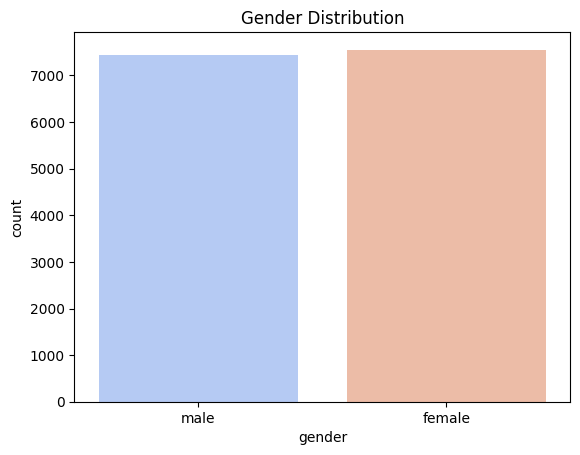

In [17]:
sns.countplot(df, x='gender', palette='coolwarm')
plt.title('Gender Distribution')
plt.show()

In [18]:
numerical_col = df.select_dtypes(include=['number']).columns
print('Numeric Columns:')
print(numerical_col)

Numeric Columns:
Index(['age', 'height', 'weight', 'duration', 'heart_rate', 'body_temp',
       'calories'],
      dtype='object')


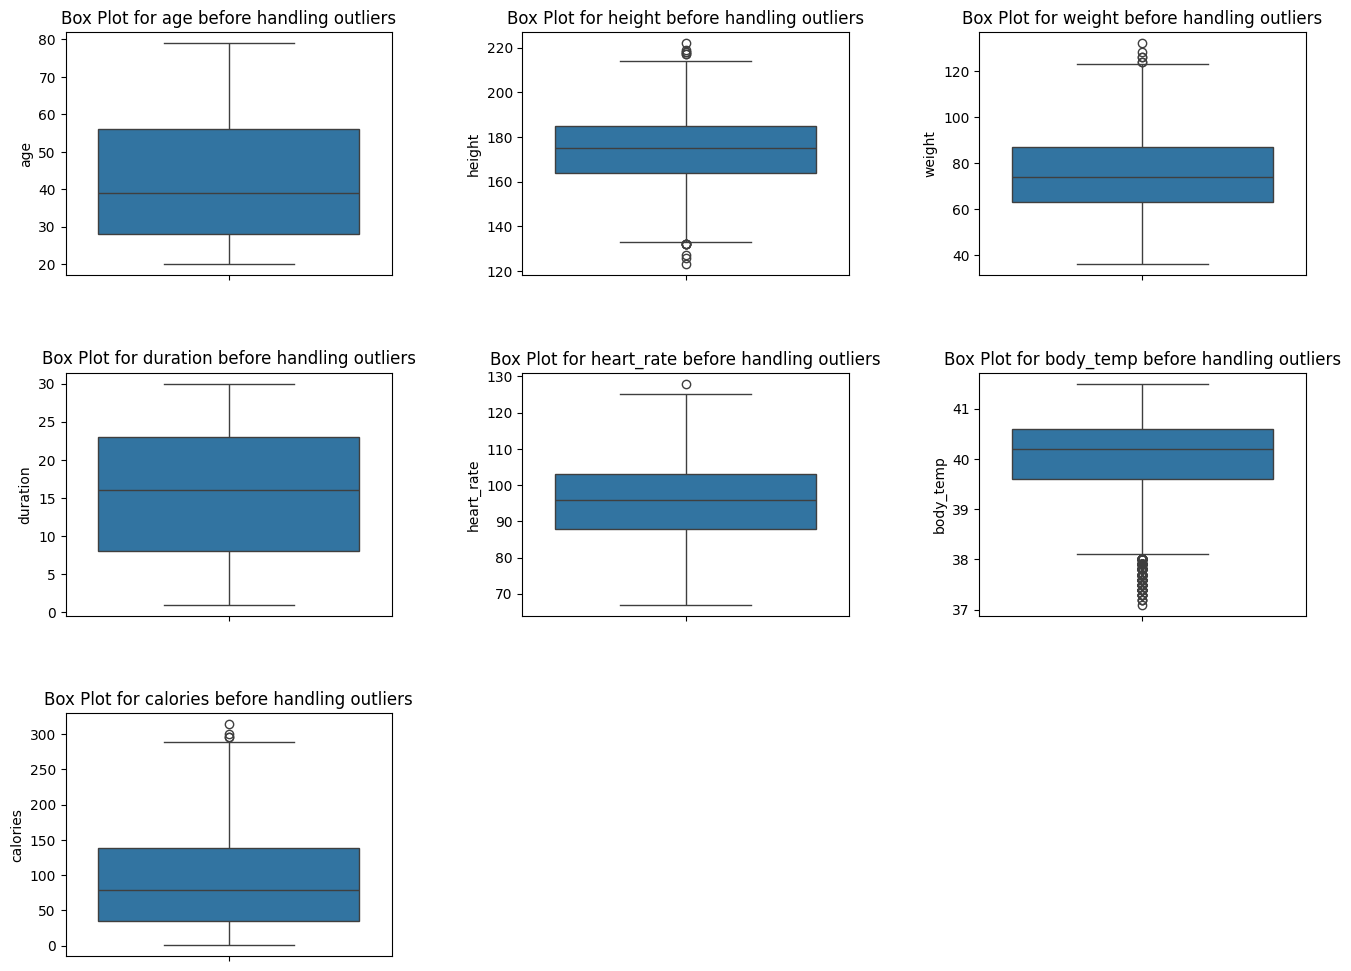

In [19]:
num_cols = 3
num_rows = math.ceil(len(numerical_col) / num_cols)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 4))
axes = axes.flatten()
for i, col in enumerate(numerical_col):
    sns.boxplot(data=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot for {col} before handling outliers')
for ax in axes[len(numerical_col):]:
    ax.set_visible(False)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

In [20]:
col_with_outliers=['height','weight','heart_rate','body_temp','calories']

In [21]:
for col in col_with_outliers:
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_threshold, lower_threshold, df[col])
    df[col] = np.where(df[col] > upper_threshold, upper_threshold, df[col])

In [22]:
from scipy.stats import skew, kurtosis
summary_stats = pd.DataFrame(columns=['Skewness', 'Kurtosis'])
for column in df.select_dtypes(include='number').columns:
    summary_stats.loc[column] = [skew(df[column]), kurtosis(df[column])]
print(summary_stats)

            Skewness  Kurtosis
age         0.473335 -0.949214
height     -0.004531 -0.529334
weight      0.223856 -0.694334
duration    0.004750 -1.184756
heart_rate -0.011207 -0.646284
body_temp  -0.865484  0.026088
calories    0.504374 -0.722330


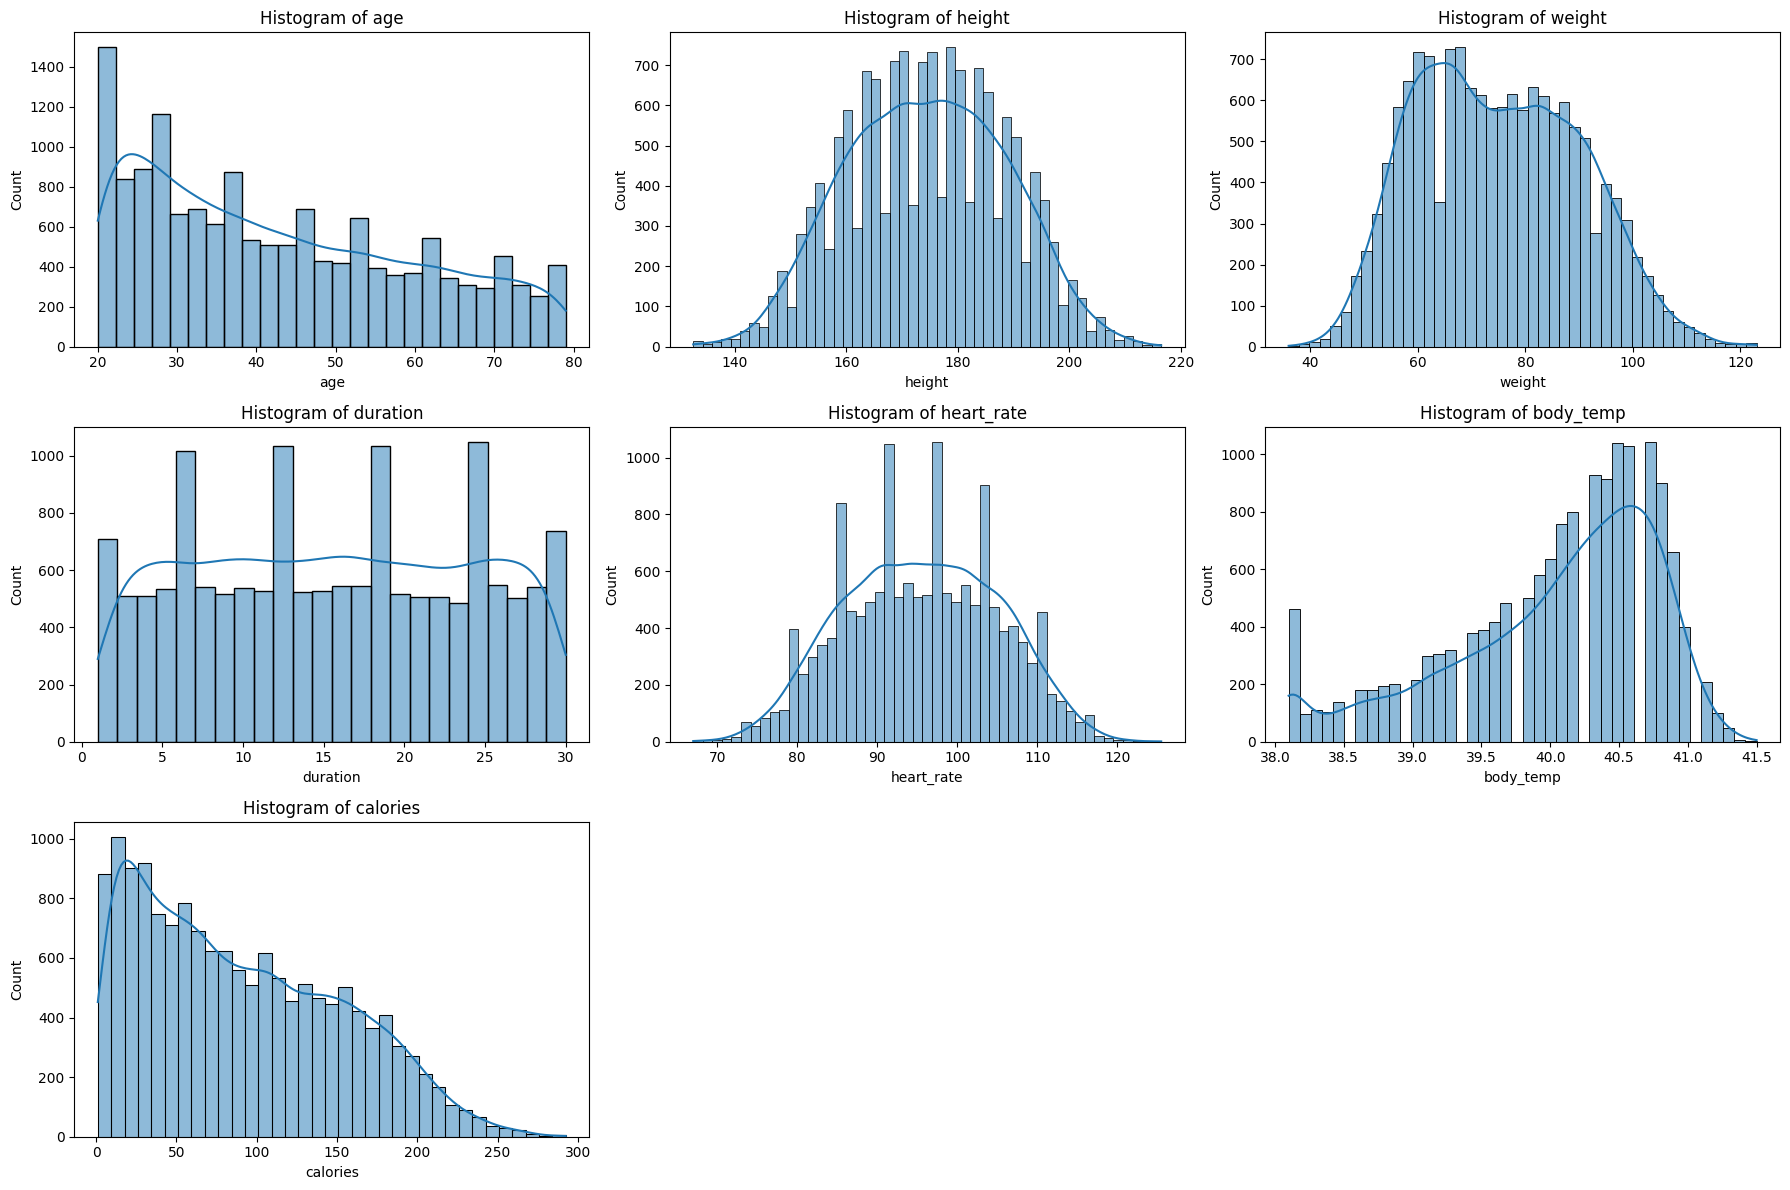

In [23]:
num_cols = len(numerical_col)
rows = math.ceil(num_cols / 3)
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(18, 4 * rows))
axes = axes.flatten()
for i, col in enumerate(numerical_col):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {col}')
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

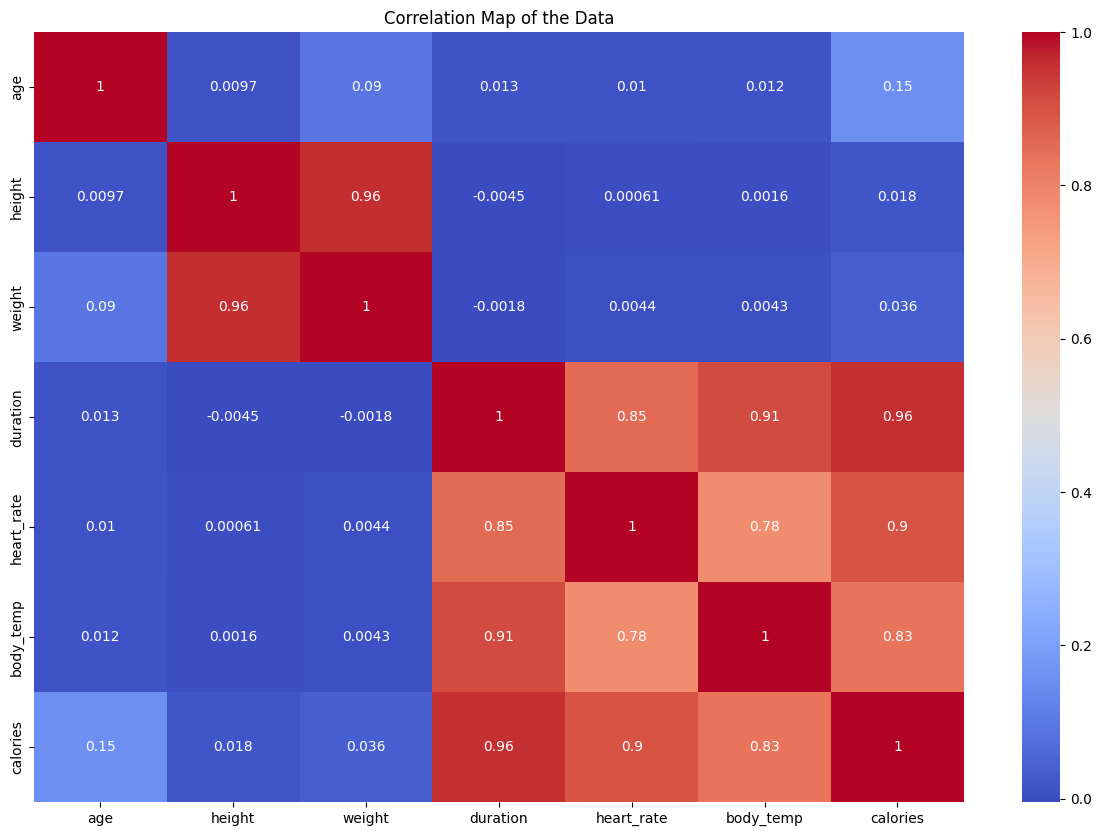

In [24]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="coolwarm")
plt.title("Correlation Map of the Data")
plt.show()

In [25]:
categorical_columns = df.select_dtypes(include=['object','category']).columns
print('Categorical Columns:')
print(categorical_columns)

Categorical Columns:
Index(['gender'], dtype='object')


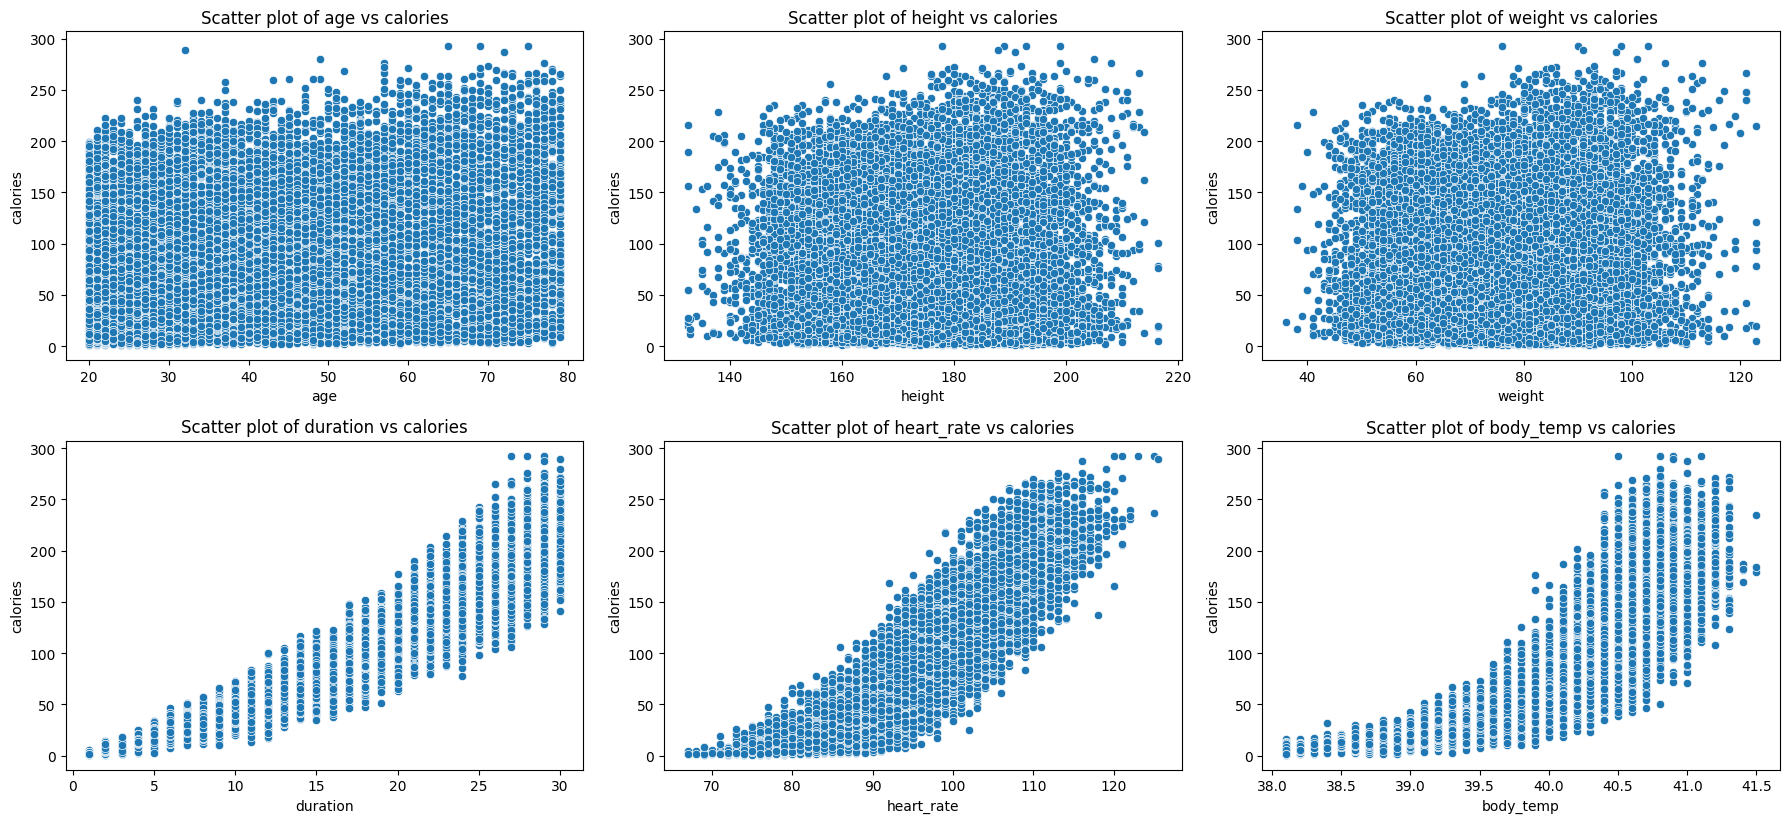

In [26]:
scatter_cols = len(numerical_col)
rows = math.ceil(scatter_cols / 3)
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(18, 4 * rows))
axes = axes.flatten()
numerical_col1 = [col for col in numerical_col if col != 'calories']
for i, col in enumerate(numerical_col1):
    sns.scatterplot(df,x=col,y="calories", ax=axes[i])
    axes[i].set_title(f'Scatter plot of {col} vs calories')
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [27]:
df=pd.get_dummies(df,columns=categorical_columns,drop_first=True,dtype="int")

In [28]:
X=df.drop(columns=["calories"])
y=df["calories"]

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
df.head()

,age,height,weight,duration,heart_rate,body_temp,calories,gender_male
0,68,190.0,94.0,29.0,105.0,40.8,231.0,1
1,20,166.0,60.0,14.0,94.0,40.3,66.0,0
2,69,179.0,79.0,5.0,88.0,38.7,26.0,1
3,34,179.0,71.0,13.0,100.0,40.5,71.0,0
4,27,154.0,58.0,10.0,81.0,39.8,35.0,0


In [31]:

!pip install XGBoost

In [32]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost.sklearn import XGBRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

regressors = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(alpha=0.1),
    "Ridge": Ridge(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "XGBoost": XGBRegressor(eval_metric='rmse'),

}

for name, regressor in regressors.items():
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"{name} - RMSE: {rmse:.4f}, R^2: {r2:.4f}, MAE: {mae:.4f}")


Linear Regression - RMSE: 11.4881, R^2: 0.9673, MAE: 8.4476
Lasso - RMSE: 11.5008, R^2: 0.9672, MAE: 8.4490
Ridge - RMSE: 11.4881, R^2: 0.9673, MAE: 8.4476
ElasticNet - RMSE: 11.7045, R^2: 0.9661, MAE: 8.6033
KNN - RMSE: 7.0700, R^2: 0.9876, MAE: 5.0280
Decision Tree - RMSE: 5.2912, R^2: 0.9931, MAE: 3.4177
Random Forest - RMSE: 2.6643, R^2: 0.9982, MAE: 1.6917
Gradient Boosting - RMSE: 3.5750, R^2: 0.9968, MAE: 2.5880
AdaBoost - RMSE: 11.8462, R^2: 0.9652, MAE: 9.4908
XGBoost - RMSE: 2.2396, R^2: 0.9988, MAE: 1.5560


**After Scaling**


In [33]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)


In [34]:

for name, regressor in regressors.items():
    regressor.fit(X_train_scaled , y_train)
    y_pred = regressor.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"{name} - RMSE: {rmse:.4f}, R^2: {r2:.4f}, MAE: {mae:.4f}")


Linear Regression - RMSE: 11.4881, R^2: 0.9673, MAE: 8.4476
Lasso - RMSE: 11.5389, R^2: 0.9670, MAE: 8.4598
Ridge - RMSE: 11.4882, R^2: 0.9673, MAE: 8.4476
ElasticNet - RMSE: 12.8804, R^2: 0.9589, MAE: 9.5387
KNN - RMSE: 5.1440, R^2: 0.9934, MAE: 3.7411
Decision Tree - RMSE: 5.3299, R^2: 0.9930, MAE: 3.4260
Random Forest - RMSE: 2.6579, R^2: 0.9982, MAE: 1.6872
Gradient Boosting - RMSE: 3.5750, R^2: 0.9968, MAE: 2.5882
AdaBoost - RMSE: 11.0829, R^2: 0.9696, MAE: 8.8532
XGBoost - RMSE: 2.2396, R^2: 0.9988, MAE: 1.5560


**`Cross Validation`**

In [35]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(alpha=0.1),
    "Ridge": Ridge(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "XGBoost": XGBRegressor(eval_metric='rmse'),

}

# Cross-validation setup
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Dictionary to store results
results = {
    'Model': [],
    'Mean RMSE': [],
    'Mean MAE': [],
    'R-squared': []
}

# Evaluate each model
for name, model in models.items():
    # Cross-validation for RMSE
    rmse_scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-rmse_scores)  # Convert negative MSE to RMSE

    # Cross-validation for MAE
    mae_scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='neg_mean_absolute_error')
    mae_scores = -mae_scores  # Convert negative MAE to positive

    # Fit the model to calculate R² on the full dataset
    model.fit(X_scaled, y)
    y_pred = model.predict(X_scaled)
    r2 = r2_score(y, y_pred)

    # Store results
    results['Model'].append(name)
    results['Mean RMSE'].append(rmse_scores.mean())
    results['Mean MAE'].append(mae_scores.mean())
    results['R-squared'].append(r2)

# Create a DataFrame to display results
results_df = pd.DataFrame(results)

# Display the performance comparison
print("Model Performance Comparison:")
print(results_df)

# fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# metrics = ['Mean MSE', 'Mean MAE', 'Mean RMSE']
# for metric in metrics:
#     ax[0].barh(results_df['Model'], results_df[metric], label=metric)
# ax[0].set_xlabel('Error')
# ax[0].set_title('Model Comparison (MSE, MAE, RMSE)')
# ax[0].legend()

# ax[1].barh(results_df['Model'], results_df['R-squared'], color='lightgreen')
# ax[1].set_xlabel('R-squared')
# ax[1].set_title('Model Comparison (R-squared)')

# plt.tight_layout()
# plt.show()

Model Performance Comparison:
               Model  Mean RMSE  Mean MAE  R-squared
0  Linear Regression  11.321825  8.372019   0.967154
1              Lasso  11.354093  8.370970   0.966962
2              Ridge  11.321826  8.371984   0.967154
3         ElasticNet  12.617626  9.449981   0.959202
4                KNN   5.191308  3.790713   0.995681
5      Decision Tree   5.346864  3.406967   1.000000
6      Random Forest   2.847584  1.770068   0.999741
7  Gradient Boosting   3.703475  2.649827   0.996724
8           AdaBoost  11.631579  9.416245   0.969030
9            XGBoost   2.148193  1.463160   0.999558


**Dimensionality Reduction**

**Unsupervised**

**PCA & ICA**

In [36]:
from sklearn.decomposition import PCA, FastICA
dimensionality_reduction = {
    "PCA": PCA(n_components=0.95),
    "ICA": FastICA(n_components=6)
}

for dr_name, reducer in dimensionality_reduction.items():
    print(f"\nDimensionality Reduction Technique: {dr_name}")

    X_train_reduced = reducer.fit_transform(X_train)
    X_test_reduced = reducer.transform(X_test)

    for name, regressor in regressors.items():
        regressor.fit(X_train_reduced, y_train)
        y_pred = regressor.predict(X_test_reduced)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        print(f"{name} - MSE: {rmse:.4f}, R^2: {r2:.4f},MAE: {mae:.4f}")

    print("="*80)


Dimensionality Reduction Technique: PCA
Linear Regression - MSE: 15.7916, R^2: 0.9382,MAE: 12.1831
Lasso - MSE: 15.7919, R^2: 0.9382,MAE: 12.1832
Ridge - MSE: 15.7916, R^2: 0.9382,MAE: 12.1831
ElasticNet - MSE: 15.7920, R^2: 0.9382,MAE: 12.1838
KNN - MSE: 11.1000, R^2: 0.9695,MAE: 8.4299
Decision Tree - MSE: 13.7922, R^2: 0.9529,MAE: 9.5365
Random Forest - MSE: 10.1949, R^2: 0.9742,MAE: 7.3261
Gradient Boosting - MSE: 9.8498, R^2: 0.9760,MAE: 7.5770
AdaBoost - MSE: 12.9387, R^2: 0.9585,MAE: 10.5182
XGBoost - MSE: 10.4276, R^2: 0.9731,MAE: 7.8629

Dimensionality Reduction Technique: ICA
Linear Regression - MSE: 11.4892, R^2: 0.9673,MAE: 8.4454
Lasso - MSE: 11.5010, R^2: 0.9672,MAE: 8.4271
Ridge - MSE: 11.4892, R^2: 0.9673,MAE: 8.4454
ElasticNet - MSE: 11.9746, R^2: 0.9645,MAE: 8.5570
KNN - MSE: 10.6849, R^2: 0.9717,MAE: 7.7516
Decision Tree - MSE: 10.1303, R^2: 0.9746,MAE: 6.5238
Random Forest - MSE: 5.8068, R^2: 0.9916,MAE: 3.7274
Gradient Boosting - MSE: 6.5858, R^2: 0.9893,MAE: 4.61

**Supervised**

**Chi-Square Test**

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression

# Step 1: Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

# Step 2: Select top 4 features using f_regression
selector = SelectKBest(score_func=f_regression, k=4)  # Select top 4 features
X_train_selected = selector.fit_transform(X_train_imputed, y_train)
X_test_selected = selector.transform(X_test_imputed)

# Step 3: Get indices and feature names of selected features
selected_features_indices = selector.get_support(indices=True)
selected_features = X_train.columns[selected_features_indices]
selected_scores = selector.scores_[selected_features_indices]

# Step 4: Print selected features and their scores
print("Top 4 Selected Feature Indices:", selected_features_indices)
print("Top 4 Selected Features:", selected_features.tolist())
print("Scores of Selected Features:", selected_scores)

# Step 5: Model training and evaluation with selected features
print("\nResults after Chi-Square feature selection (Top 4 Features):")
for name, model in regressors.items():
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)


    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"{name} - RMSE: {rmse:.4f}, R^2: {r2:.4f}, MAE: {mae:.4f}")


Top 4 Selected Feature Indices: [0 3 4 5]
Top 4 Selected Features: ['age', 'duration', 'heart_rate', 'body_temp']
Scores of Selected Features: [   287.74112841 125114.88620058  49634.42222079  27472.4972852 ]

Results after Chi-Square feature selection (Top 4 Features):
Linear Regression - RMSE: 4.9603, R^2: 0.9663, MAE: 8.4873
Lasso - RMSE: 4.9603, R^2: 0.9652, MAE: 8.5521
Ridge - RMSE: 4.9603, R^2: 0.9663, MAE: 8.4866
ElasticNet - RMSE: 4.9603, R^2: 0.8598, MAE: 18.2105
KNN - RMSE: 4.9603, R^2: 0.9841, MAE: 5.4551
Decision Tree - RMSE: 4.9603, R^2: 0.9705, MAE: 6.8281
Random Forest - RMSE: 4.9603, R^2: 0.9845, MAE: 5.2905
Gradient Boosting - RMSE: 4.9603, R^2: 0.9861, MAE: 5.2537
AdaBoost - RMSE: 4.9603, R^2: 0.9624, MAE: 9.8246
XGBoost - RMSE: 4.9603, R^2: 0.9829, MAE: 5.4218


**Lasso**

In [39]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Fit Lasso model
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_train, y_train)

# Extract important features
important_features_indices = np.where(lasso.coef_ != 0)[0]
important_features = pd.DataFrame({
    'Feature': X.columns[important_features_indices],
    'Coefficient': lasso.coef_[important_features_indices]
})
important_features['Abs_Coefficient'] = important_features['Coefficient'].abs()

# Select top 5 features
top5_features = important_features.sort_values(by='Abs_Coefficient', ascending=False).head(5)
selected_features = top5_features['Feature'].tolist()

print("Top 5 features selected by Lasso with their coefficients:")
print(top5_features[['Feature', 'Coefficient']])

# Filter the dataset based on top 5 features
X_train_lasso = X_train[selected_features]
X_test_lasso = X_test[selected_features]

# Model evaluation using top 5 features
print("\nResults after Lasso feature selection (Top 5 Features):")
for name, model in regressors.items():
    model.fit(X_train_lasso, y_train)
    y_pred = model.predict(X_test_lasso)


    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"{name} - RMSE: {rmse:.4f}, R^2: {r2:.4f}, MAE: {mae:.4f}")


Top 5 features selected by Lasso with their coefficients:
       Feature  Coefficient
5    body_temp   -17.892245
3     duration     6.682220
4   heart_rate     1.988413
6  gender_male    -1.254417
0          age     0.500807

Results after Lasso feature selection (Top 5 Features):
Linear Regression - RMSE: 4.9603, R^2: 0.9668, MAE: 8.4648
Lasso - RMSE: 4.9603, R^2: 0.9667, MAE: 8.4660
Ridge - RMSE: 4.9603, R^2: 0.9668, MAE: 8.4648
ElasticNet - RMSE: 4.9603, R^2: 0.9655, MAE: 8.6105
KNN - RMSE: 4.9603, R^2: 0.9890, MAE: 4.4351
Decision Tree - RMSE: 4.9603, R^2: 0.9927, MAE: 3.6125
Random Forest - RMSE: 4.9603, R^2: 0.9965, MAE: 2.5632
Gradient Boosting - RMSE: 4.9603, R^2: 0.9948, MAE: 3.3170
AdaBoost - RMSE: 4.9603, R^2: 0.9668, MAE: 9.3330
XGBoost - RMSE: 4.9603, R^2: 0.9965, MAE: 2.5896


**Fisher Score**

In [40]:
from sklearn.feature_selection import f_regression
fisher_scores, p_values = f_regression(X_train, y_train)

fisher_results = pd.DataFrame({
    'Feature': X_train.columns,
    'Fisher Score': fisher_scores,
    'P-Value': p_values
})

# Sort by Fisher score in descending order
fisher_results = fisher_results.sort_values(by='Fisher Score', ascending=False)

# Select top 5 features with p-value < 0.05
top_5_important_features = fisher_results[fisher_results['P-Value'] < 0.05].head(5)['Feature'].values
print("Top 5 Important features based on Fisher's score:")
print(top_5_important_features)

# Selecting only the top 5 important features for model building
X_train_important = X_train[top_5_important_features]
X_test_important = X_test[top_5_important_features]

print("\nResults after applying Fisher's score with top 5 features:")
for name, model in regressors.items():
    model.fit(X_train_important, y_train)
    y_pred = model.predict(X_test_important)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"{name} - RMSE: {rmse:.4f}, R^2: {r2:.4f}, MAE: {mae:.4f}")


Top 5 Important features based on Fisher's score:
['duration' 'heart_rate' 'body_temp' 'age' 'weight']

Results after applying Fisher's score with top 5 features:
Linear Regression - RMSE: 132.6462, R^2: 0.9671, MAE: 8.4715
Lasso - RMSE: 132.8684, R^2: 0.9671, MAE: 8.4735
Ridge - RMSE: 132.6464, R^2: 0.9671, MAE: 8.4715
ElasticNet - RMSE: 137.5721, R^2: 0.9659, MAE: 8.6269
KNN - RMSE: 40.1189, R^2: 0.9901, MAE: 4.3639
Decision Tree - RMSE: 49.2654, R^2: 0.9878, MAE: 4.1695
Random Forest - RMSE: 18.2877, R^2: 0.9955, MAE: 2.5122
Gradient Boosting - RMSE: 21.0681, R^2: 0.9948, MAE: 3.1069
AdaBoost - RMSE: 138.3841, R^2: 0.9657, MAE: 9.3982
XGBoost - RMSE: 18.6773, R^2: 0.9954, MAE: 2.4974


**Forward Selection**

In [41]:
import statsmodels.api as sm

def forward_selection(X, y, significance_level=0.05, num_features=5):
    initial_features = []
    remaining_features = list(X.columns)
    selected_features = []

    while remaining_features and len(selected_features) < num_features:
        best_p_value = significance_level
        best_feature = None
        for feature in remaining_features:
            features_to_test = initial_features + [feature]
            X_train_fs = sm.add_constant(X[features_to_test])
            model = sm.OLS(y, X_train_fs).fit()
            p_value = model.pvalues[feature]
            if p_value < best_p_value:
                best_p_value = p_value
                best_feature = feature
        if best_feature:
            initial_features.append(best_feature)
            remaining_features.remove(best_feature)
            selected_features.append(best_feature)
        else:
            break

    return selected_features

# Select the top 5 features using forward selection
selected_features_fs = forward_selection(X_train, y_train, num_features=5)

# Prepare data with selected features
X_train_fs = X_train[selected_features_fs]
X_test_fs = X_test[selected_features_fs]

print("Selected features by Forward Selection:", selected_features_fs)


Selected features by Forward Selection: ['duration', 'age', 'heart_rate', 'body_temp', 'weight']


In [42]:
print("Results after Forward Selection:")
for name, model in regressors.items():
    model.fit(X_train_fs, y_train)
    y_pred = model.predict(X_test_fs)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{name} - RMSE: {rmse:.4f}, R^2: {r2:.4f},MAE: {mae:.4f}")

Results after Forward Selection:
Linear Regression - RMSE: 132.6462, R^2: 0.9671,MAE: 8.4715
Lasso - RMSE: 132.8684, R^2: 0.9671,MAE: 8.4735
Ridge - RMSE: 132.6464, R^2: 0.9671,MAE: 8.4715
ElasticNet - RMSE: 137.5721, R^2: 0.9659,MAE: 8.6269
KNN - RMSE: 40.1564, R^2: 0.9900,MAE: 4.3672
Decision Tree - RMSE: 50.5841, R^2: 0.9875,MAE: 4.1732
Random Forest - RMSE: 18.6500, R^2: 0.9954,MAE: 2.5235
Gradient Boosting - RMSE: 21.0681, R^2: 0.9948,MAE: 3.1069
AdaBoost - RMSE: 128.1233, R^2: 0.9683,MAE: 9.0089
XGBoost - RMSE: 18.6167, R^2: 0.9954,MAE: 2.4950


**Hyperparameter tuning**

In [43]:
from sklearn.model_selection import GridSearchCV
X_train_lasso = X_train[selected_features]
X_test_lasso = X_test[selected_features]
param_grids = {
    "Lasso": {
        'alpha': [0.01, 0.1, 1, 10]
    },
    "Ridge": {
        'alpha': [0.01, 0.1, 1, 10]
    },
    "Elastic Net": {
        'alpha': [0.01, 0.1, 1, 10],
        'l1_ratio': [0.2, 0.5, 0.8]
    },
    "KNN": {
        'n_neighbors': [3, 5, 7, 10],
        'weights': ['uniform', 'distance']
    },
    "Decision Tree": {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    "Gradient Boosting": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10]
    },
    "XGBoost": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10]
    },

    "AdaBoost": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1]
    }
}

print("\nHyperparameter Tuning for Regression Models")
print("-" * 50)

regressors = {
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "Elastic Net": ElasticNet(),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(eval_metric='rmse'),

    "AdaBoost": AdaBoostRegressor(),

}
# Grid search for each model
for reg_name, reg in regressors.items():
    print(f"\nRegressor: {reg_name}")
    grid_search = GridSearchCV(reg, param_grids.get(reg_name, {}), cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_lasso, y_train)  # Use the Lasso-selected features

    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Best Cross-Validation Score (MSE): {-grid_search.best_score_:.4f}")

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_lasso)

    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.4f}")
    print(f"R^2 Score: {r2_score(y_test, y_pred):.4f}")
    print("=" * 50)



Hyperparameter Tuning for Regression Models
--------------------------------------------------

Regressor: Lasso
Best Parameters: {'alpha': 0.01}
Best Cross-Validation Score (MSE): 129.0504
Mean Squared Error: 134.0114
Mean Absolute Error: 8.4645
R^2 Score: 0.9668

Regressor: Ridge
Best Parameters: {'alpha': 0.01}
Best Cross-Validation Score (MSE): 129.0477
Mean Squared Error: 133.9807
Mean Absolute Error: 8.4648
R^2 Score: 0.9668

Regressor: Elastic Net
Best Parameters: {'alpha': 0.01, 'l1_ratio': 0.8}
Best Cross-Validation Score (MSE): 129.0726
Mean Squared Error: 134.0625
Mean Absolute Error: 8.4654
R^2 Score: 0.9668

Regressor: KNN
Best Parameters: {'n_neighbors': 7, 'weights': 'distance'}
Best Cross-Validation Score (MSE): 43.6482
Mean Squared Error: 41.9063
Mean Absolute Error: 4.2581
R^2 Score: 0.9896

Regressor: Decision Tree
Best Parameters: {'max_depth': 30, 'min_samples_split': 5}
Best Cross-Validation Score (MSE): 30.6090
Mean Squared Error: 28.1330
Mean Absolute Error: 3.

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [47]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Select features based on Lasso feature selection
X_train_lasso = X_train[selected_features]
X_test_lasso = X_test[selected_features]

# Parameter grids for hyperparameter tuning
param_grids = {
    "XGBoost": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10]
    },

    "AdaBoost": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1]
    }
}

print("\nHyperparameter Tuning for Regression Models")
print("-" * 50)

# Define regressors
regressors = {
    "XGBoost": XGBRegressor(eval_metric='rmse', verbosity=0),  # Suppress XGBoost output

    "AdaBoost": AdaBoostRegressor(),  # AdaBoost has no verbose output by default
}

# Grid search for each model
for reg_name, reg in regressors.items():
    print(f"\nRegressor: {reg_name}")
    grid_search = GridSearchCV(reg, param_grids.get(reg_name, {}), cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_lasso, y_train)  # Use the Lasso-selected features

    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Best Cross-Validation Score (MSE): {-grid_search.best_score_:.4f}")

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_lasso)

    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.4f}")
    print(f"R^2 Score: {r2_score(y_test, y_pred):.4f}")
    print("=" * 50)



Hyperparameter Tuning for Regression Models
--------------------------------------------------

Regressor: XGBoost
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best Cross-Validation Score (MSE): 12.5503
Mean Squared Error: 11.9902
Mean Absolute Error: 2.3843
R^2 Score: 0.9970

Regressor: AdaBoost
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 200}
Best Cross-Validation Score (MSE): 135.4361
Mean Squared Error: 137.6199
Mean Absolute Error: 9.2506
R^2 Score: 0.9659


**Stacking**


In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_train_lasso = X_train[selected_features]
X_test_lasso = X_test[selected_features]
base_models = [

    ('Gradient Boosting', GradientBoostingRegressor(learning_rate=0.1, n_estimators=200, max_depth=5)),
    ('xgboost', XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=200))
]

final_estimator = LinearRegression()

stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=final_estimator,
    cv=5
)

stacking_regressor.fit(X_train_lasso, y_train)

y_pred_stack = stacking_regressor.predict(X_test_lasso)

mse_stack = mean_squared_error(y_test, y_pred_stack)
mae_stack = mean_absolute_error(y_test, y_pred_stack)
r2_stack = r2_score(y_test, y_pred_stack)

print("Stacking Regressor Performance:")
print(f"Mean Squared Error (MSE): {mse_stack:.4f}")
print(f"Mean Absolute Error (MAE): {mae_stack:.4f}")
print(f"R^2 Score: {r2_stack:.4f}")


In [ ]:
from sklearn.svm import SVR

In [ ]:
base_models = [

    ('Gradient Boosting', GradientBoostingRegressor(learning_rate=0.1, n_estimators=200, max_depth=5)),
    ('xgboost', XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=200))
]
X_train_lasso = X_train[selected_features]
X_test_lasso = X_test[selected_features]
# Final estimator (SVR)
final_estimator = SVR(kernel='rbf', C=10, gamma=0.1)

# Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=final_estimator,
    cv=5
)

# Fit the stacking regressor
stacking_regressor.fit(X_train_lasso, y_train)

# Predictions
y_pred_stack = stacking_regressor.predict(X_test_lasso)

# Performance metrics
mse_stack = mean_squared_error(y_test, y_pred_stack)
mae_stack = mean_absolute_error(y_test, y_pred_stack)
r2_stack = r2_score(y_test, y_pred_stack)

# Print results
print("Stacking Regressor Performance with SVR as Final Estimator:")
print(f"Mean Squared Error (MSE): {mse_stack:.4f}")
print(f"Mean Absolute Error (MAE): {mae_stack:.4f}")
print(f"R^2 Score: {r2_stack:.4f}")

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_train_lasso = X_train[selected_features]
X_test_lasso = X_test[selected_features]
base_models = [
    ('xgboost', XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=200, random_state=42)),
    ('gradient_boosting', GradientBoostingRegressor(learning_rate=0.1, max_depth=5, n_estimators=200)),
    ('random_forest', RandomForestRegressor(n_estimators=200, max_depth=20, min_samples_split=2, random_state=42)),
    ('lasso', Lasso(alpha=0.01))
]

final_estimator = LinearRegression()

stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=final_estimator,
    cv=5
)

stacking_regressor.fit(X_train_lasso, y_train)

y_pred_stack = stacking_regressor.predict(X_test_lasso)

mse_stack = mean_squared_error(y_test, y_pred_stack)
mae_stack = mean_absolute_error(y_test, y_pred_stack)
r2_stack = r2_score(y_test, y_pred_stack)

print("Stacking Regressor Performance:")
print(f"Mean Squared Error (MSE): {mse_stack:.4f}")
print(f"Mean Absolute Error (MAE): {mae_stack:.4f}")
print(f"R^2 Score: {r2_stack:.4f}")



**Bagging**

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

bagging_regressor = BaggingRegressor(
    estimator=RandomForestRegressor(
        n_estimators=200,
        max_depth=20,
        min_samples_split=2,
        random_state=42
    ),
    n_estimators=10,
    random_state=42
)
X_train_lasso = X_train[selected_features]
X_test_lasso = X_test[selected_features]
bagging_regressor.fit(X_train_lasso, y_train)

y_pred_bag = bagging_regressor.predict(X_test_lasso)

mse_bag = mean_squared_error(y_test, y_pred_bag)
mae_bag = mean_absolute_error(y_test, y_pred_bag)
r2_bag = r2_score(y_test, y_pred_bag)

print("Bagging Regressor Performance:")
print(f"Mean Squared Error (MSE): {mse_bag:.4f}")
print(f"Mean Absolute Error (MAE): {mae_bag:.4f}")
print(f"R^2 Score: {r2_bag:.4f}")


In [ ]:
from sklearn.datasets import make_regression # Importing make_regression
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlp_model = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    learning_rate='adaptive',
    max_iter=500,
    random_state=42
)

mlp_model.fit(X_train, y_train)

y_pred = mlp_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

SHAP & LIME

In [45]:
pip install shap lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=18ae341670ffd99028880685b2175b8f469c6bbeb8db53ac89ca3d6acf791c2f
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
df.columns

In [ ]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Example DataFrame with correct column names (replace this with your dataset)
feature_names = ['age', 'height', 'weight', 'duration', 'heart_rate', 'body_temp', 'gender_male']
target_column = 'calories'  # Target column

# Create a sample DataFrame
df = pd.DataFrame(np.random.randn(1000, 7), columns=feature_names)
df[target_column] = np.random.rand(1000) * 100  # Assign random target values

# Check the columns in the DataFrame
print("Columns in DataFrame:", df.columns)

# Separate features (X) and target (y)
X = df[feature_names[:-1]]  # Exclude 'calories' from features
y = df[target_column]  # Target is 'calories'

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model (RandomForestRegressor in this case)
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# SHAP explanations
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Compute feature importance based on average absolute SHAP values
shap_abs_values = np.abs(shap_values).mean(axis=0)
feature_importance = pd.DataFrame({
    'Feature': feature_names[:-1],  # Exclude 'calories' as it's not a feature
    'Importance': shap_abs_values
})

# Sort by importance and select top 6 features
top6_features = feature_importance.sort_values(by='Importance', ascending=False).head(6)

# Get the names of the top 6 important features
top6_feature_names = top6_features['Feature'].values

# Filter SHAP values and X_test to keep only top 6 features
top6_feature_indices = [i for i, feature in enumerate(feature_names[:-1]) if feature in top6_feature_names]
shap_values_top6 = shap_values[:, top6_feature_indices]
X_test_top6 = X_test.iloc[:, top6_feature_indices]

# Summary plot for top 6 features
shap.summary_plot(shap_values_top6, X_test_top6, feature_names=top6_feature_names)

# Force plot for a single prediction (using the first instance in the test set)
shap.force_plot(explainer.expected_value, shap_values_top6[0, :], X_test_top6.iloc[0, :], feature_names=top6_feature_names)


In [ ]:
!pip install lime

In [ ]:
import lime
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt

# Initialize the LIME explainer
explainer = LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['calories'],  # The target variable
    mode='regression'  # Since this is a regression problem
)

# Pick a random instance from the test set to explain
i = 1   # Index of the instance you want to explain
instance = X_test.iloc[i, :].values.reshape(1, -1)


plt.show()
